In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pickle
# from PythonScripts import extract
import categorize
import extractor

model_folder_path = "C:\\Users\Harsh\Desktop\Projects\Handwriting-Analysis-using-Machine-Learning\models"
test_path = "C:\\Users\Harsh\Desktop\Projects\Handwriting-Analysis-using-Machine-Learning\Test Images/"

def predict(file_name):

    filename1 = model_folder_path + "\clf1.sav"
    # filename2 = model_folder_path + "\clf2.sav"
    filename3 = model_folder_path + "\clf3.sav"
    filename4 = model_folder_path + "\clf4.sav"
    filename5 = model_folder_path + "\clf5.sav"
    filename6 = model_folder_path + "\clf6.sav"
    filename7 = model_folder_path + "\clf7.sav"
    filename8 = model_folder_path + "\clf8.sav"

    clf1 = pickle.load(open(filename1, 'rb'))
    # clf2 = pickle.load(open(filename2, 'rb'))
    clf3 = pickle.load(open(filename3, 'rb'))
    clf4 = pickle.load(open(filename4, 'rb'))
    clf5 = pickle.load(open(filename5, 'rb'))
    clf6 = pickle.load(open(filename6, 'rb'))
    clf7 = pickle.load(open(filename7, 'rb'))
    clf8 = pickle.load(open(filename8, 'rb'))    

    raw_features = extractor.start(file_name)
    print("\nHandwritting Features\n")
    raw_baseline_angle = raw_features[0]
    baseline_angle, comment = categorize.determine_baseline_angle(raw_baseline_angle)
    print("Baseline Angle: "+comment)

    raw_top_margin = raw_features[1]
    top_margin, comment = categorize.determine_top_margin(raw_top_margin)
    print("Top Margin: "+comment)

    raw_letter_size = raw_features[2]
    letter_size, comment = categorize.determine_letter_size(raw_letter_size)
    print("Letter Size: "+ comment)

    raw_line_spacing = raw_features[3]
    line_spacing, comment = categorize.determine_line_spacing(raw_line_spacing)
    print("Line Spacing: "+ comment)

    raw_word_spacing = raw_features[4]
    word_spacing, comment = categorize.determine_word_spacing(raw_word_spacing)
    print("Word Spacing: "+ comment)

    # raw_pen_pressure = raw_features[5]
    # pen_pressure, comment = categorize.determine_pen_pressure(raw_pen_pressure)
    # print("Pen Pressure: "+ comment)

    raw_slant_angle = raw_features[5]
    slant_angle, comment = categorize.determine_slant_angle(raw_slant_angle)
    print("Slant Angle: "+ comment)

    print("\nPersonality Traits\n")
    if bool(clf1.predict([[baseline_angle, slant_angle]])[0]):
        a = "Present"
    else:
        a = "Absent"
    print("Emotional Stability: ", a)

    # if bool(clf2.predict([[letter_size, pen_pressure]])[0]):
    #     a = "Present"
    # else:
    #     a = "Absent"
    # print("Mental Energy or Will Power: ", a)

    if bool(clf3.predict([[letter_size, top_margin]])[0]):
        a = "Present"
    else:
        a = "Absent"
    print("Modesty: ", a)

    if bool(clf4.predict([[line_spacing, word_spacing]])[0]):
        a = "Present"
    else:
        a = "Absent"
    print("Personal Harmony and Flexibility: ", a)

    if bool(clf5.predict([[slant_angle, top_margin]])[0]):
        a = "Present"
    else:
        a = "Absent"
    print("Lack of Discipline: ", a)

    if bool(clf6.predict([[letter_size, line_spacing]])[0]):
        a = "Present"
    else:
        a = "Absent"
    print("Poor Concentration: ", a)

    if bool(clf7.predict([[letter_size, word_spacing]])[0]):
        a = "Present"
    else:
        a = "Absent"
    print("Non Communicativeness: ", a)

    if bool(clf8.predict([[line_spacing, word_spacing]])[0]):
        a = "Present"
    else:
        a = "Absent"
    print("Social Isolation: ", a)

    print("#----------------x-----------x------------x---------x-------------x-----------x------------#")

def output(Image):
    path = test_path + Image
    predict(path)
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()


Handwritting Features

Baseline Angle: STRAIGHT
Top Margin: NARROW
Letter Size: BIG
Line Spacing: SMALL
Word Spacing: SMALL
Slant Angle: IRREGULAR

Personality Traits

Emotional Stability:  Absent
Modesty:  Absent
Personal Harmony and Flexibility:  Absent
Lack of Discipline:  Present
Poor Concentration:  Present
Non Communicativeness:  Absent
Social Isolation:  Absent
#----------------x-----------x------------x---------x-------------x-----------x------------#


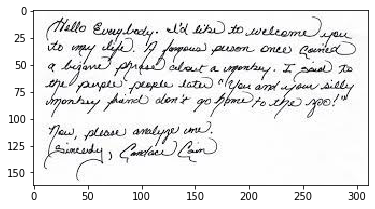

In [10]:
output("Img (7).jpg")